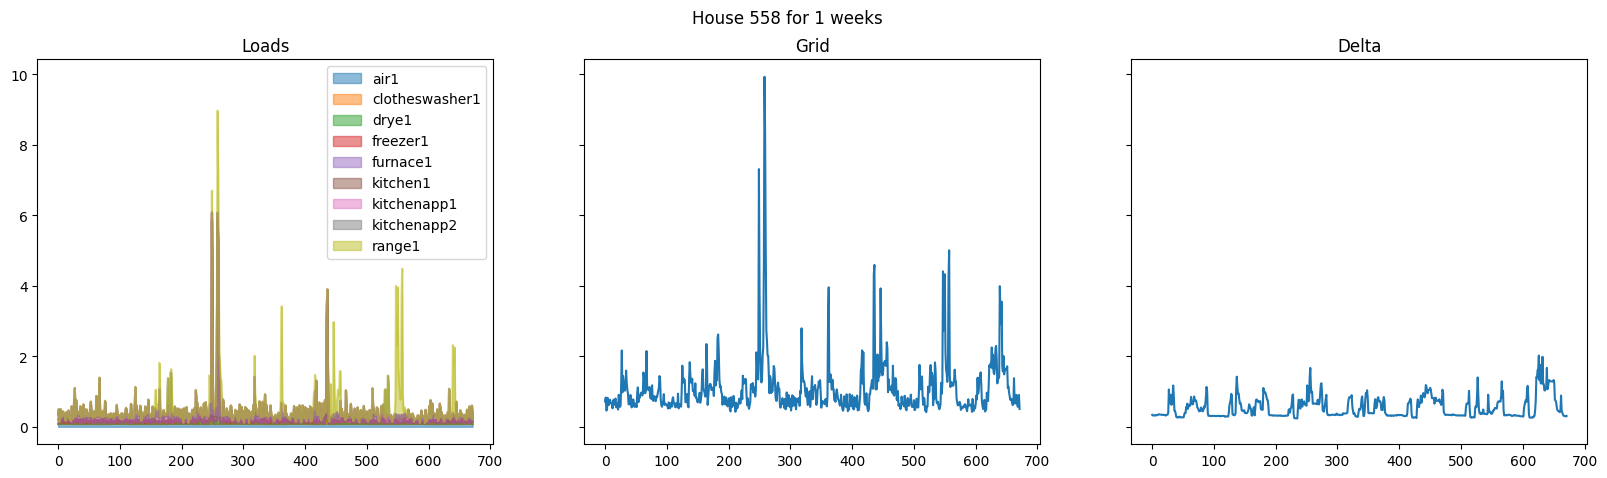

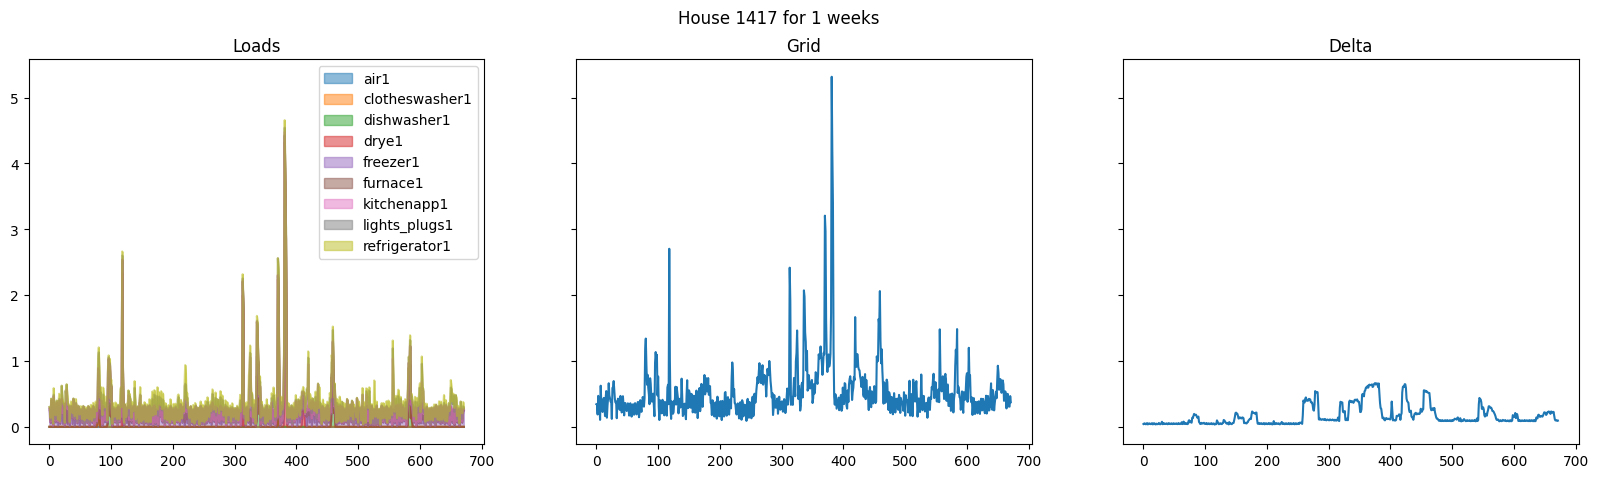

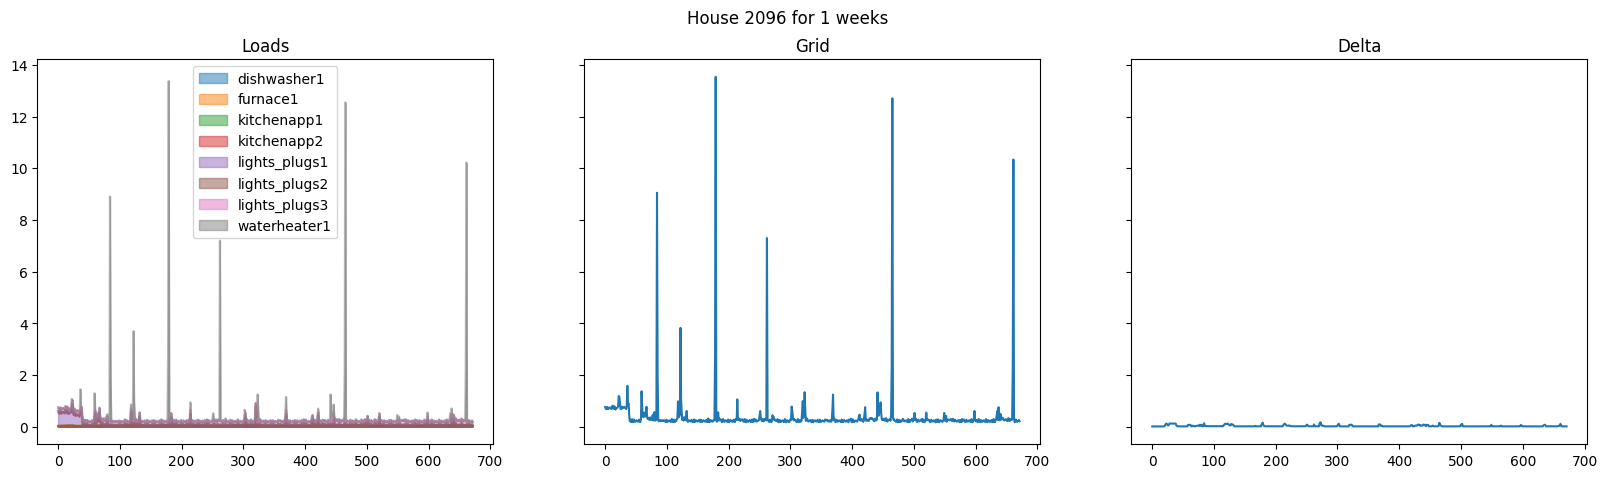

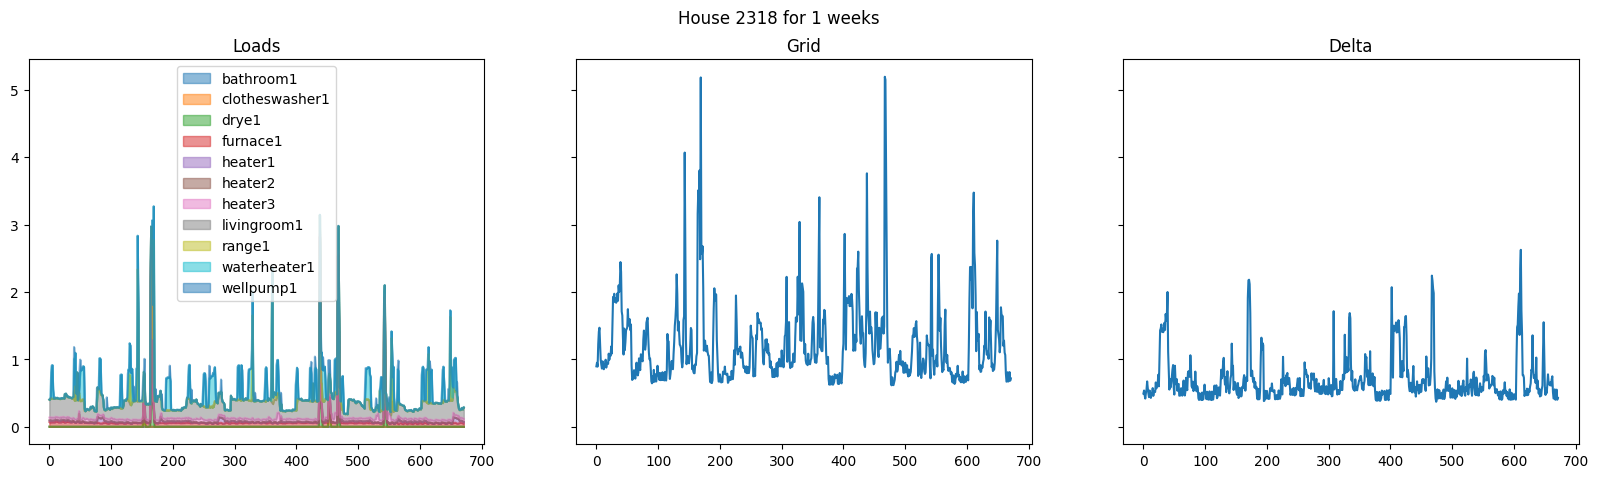

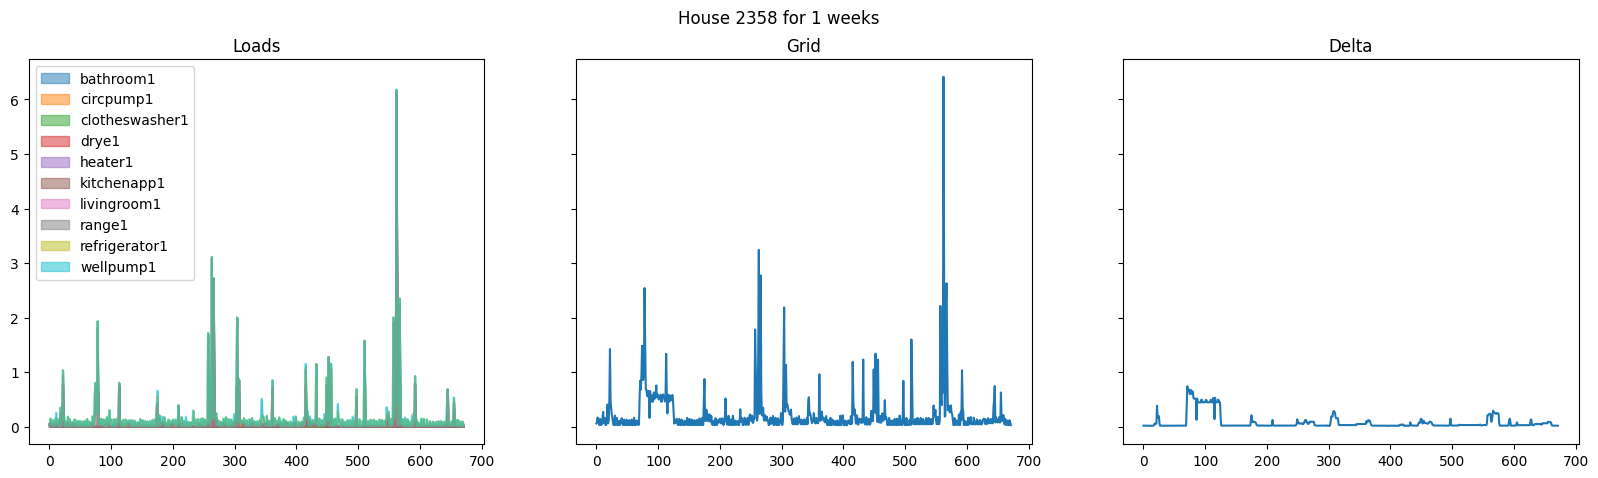

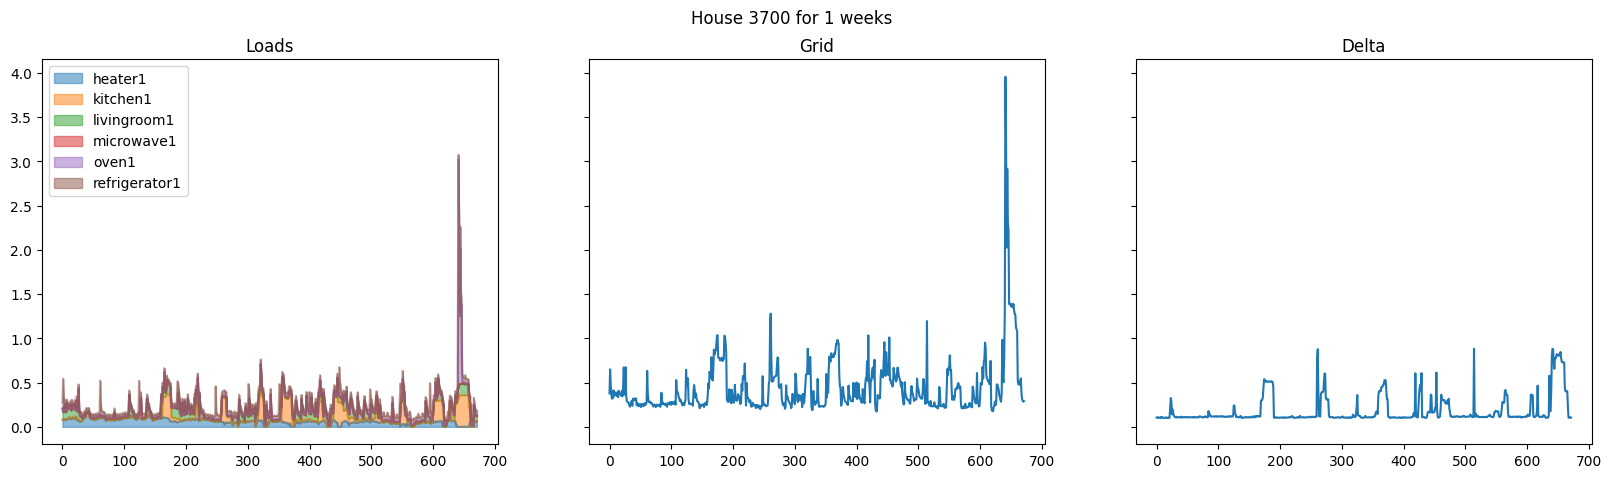

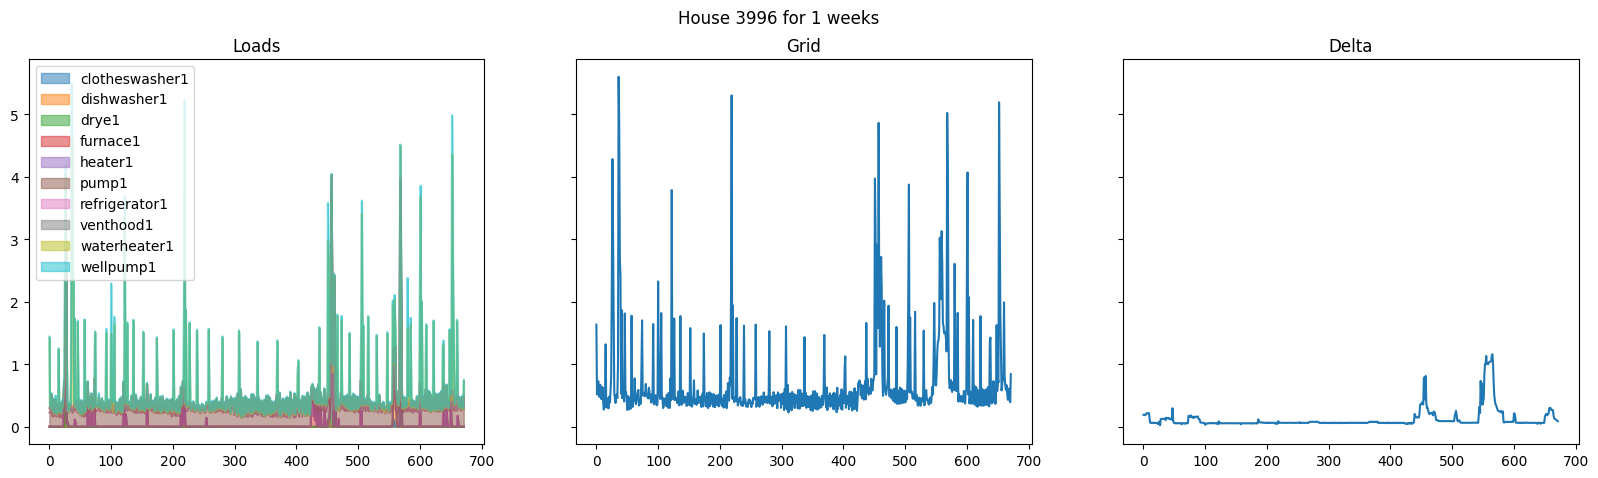

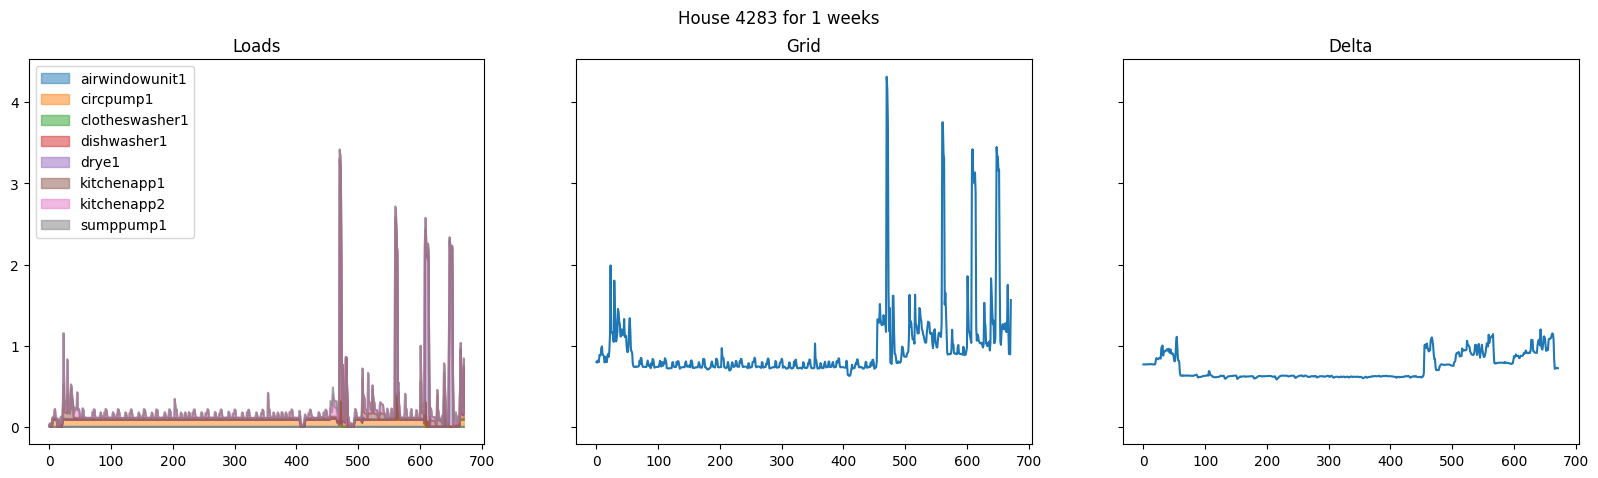

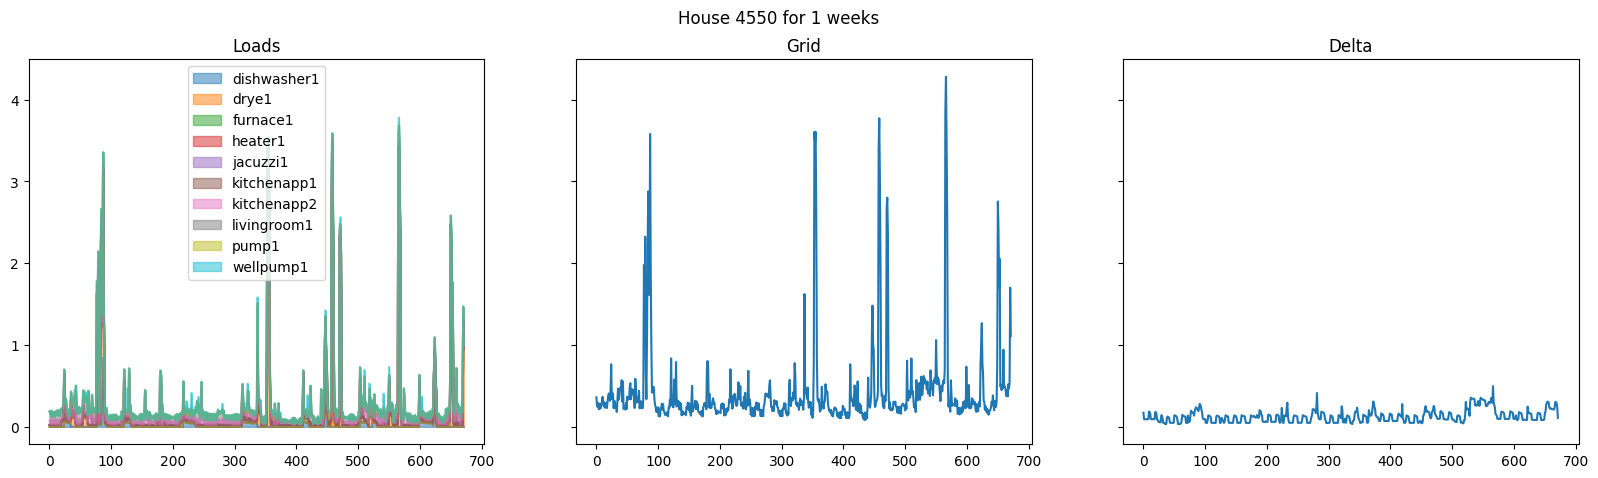

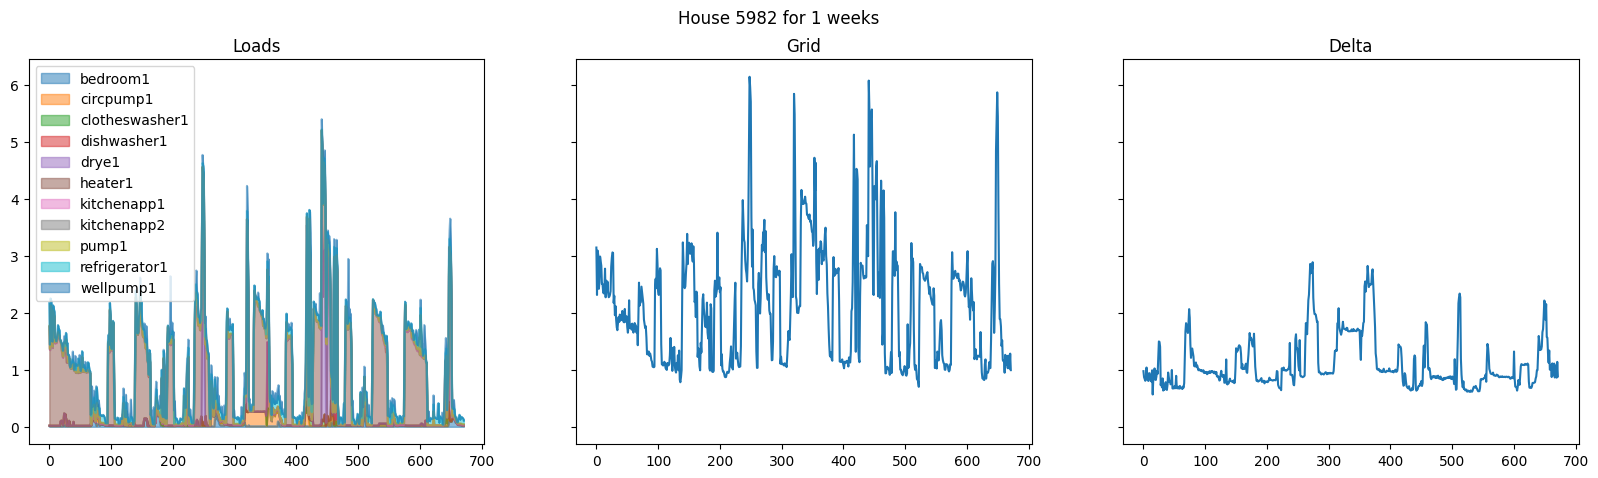

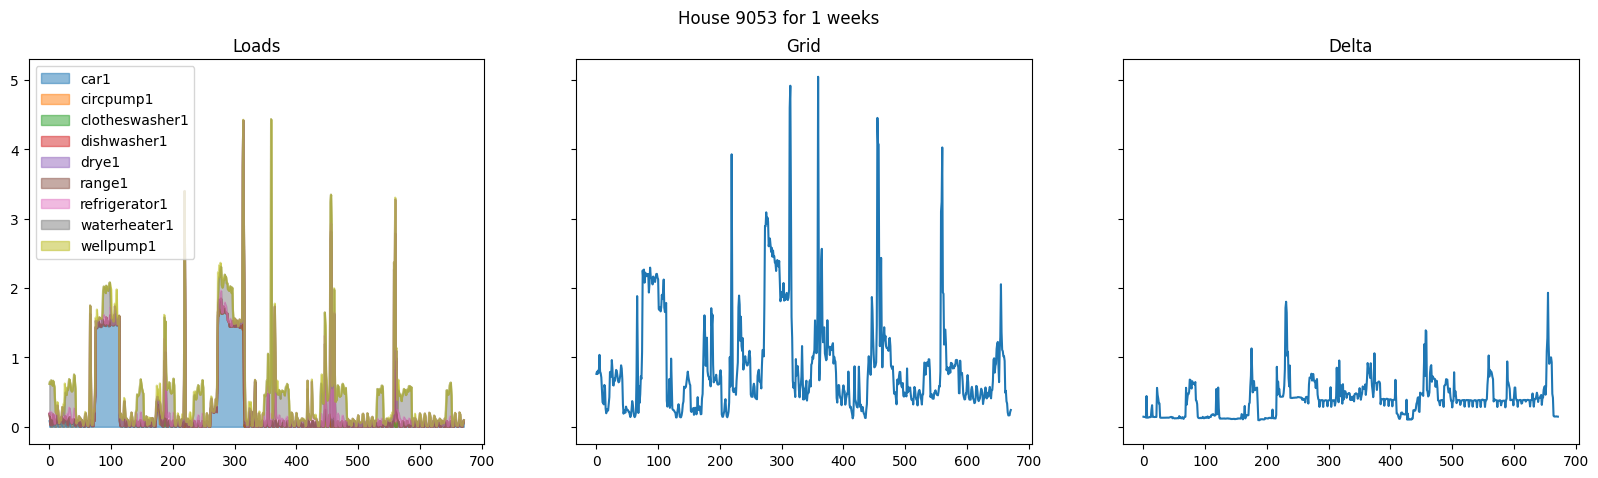

[558, 1417, 2096, 2318, 2358, 3700, 3996, 4283, 4550, 5982, 9053]

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

_path = '/Users/darwish/Documents/Berkeley_Offline/W210/capstone/data/pecan_street/15_min/15minute_data_newyork/15minute_data_newyork.csv'
df = pd.read_csv(_path)

def drop_100_na(df):
    # Drop rows with 100% NA
    nan_counts = df.isna().mean()
    df = df.drop(nan_counts[nan_counts == 1].index, axis=1)
    return df

def plot_houses(dataframe, num_weeks):
    out = []
    for house, df in dataframe.sort_values('dataid').groupby('dataid'):
        drop_cols = ['dataid', 'local_15min', 'leg1v', 'leg2v', ]
        _df = (
            df
            .pipe(drop_100_na)
            .sort_values('local_15min', ascending=True)
            .drop(columns=drop_cols, errors='ignore')
            .fillna(0)
            .iloc[:int(24*4 * 7 * num_weeks)]
            .reset_index(drop=True)
        )

        # skip conditions
        if (
            'solar' in _df.columns
            or 'energy_storage_system' in _df.columns
            or len(_df.columns) < 2
            or np.any(_df.grid < 0)
        ):
            continue

        loads = (
                _df
                .clip(lower=0)
                .pipe(lambda x: x[[col for col in x.columns if col not in ['solar', 'grid', 'energy_storage_system']]])
            )
        
        grid = _df['grid']

        delta = grid - loads.sum(axis=1)

        
        # plot
        fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
        title = f'House {house} for {num_weeks} weeks'
        plt.suptitle(title)
        
        loads.plot.area(ax=ax[0], alpha=0.5, stacked=True)
        ax[1].plot(grid, label='grid')
        ax[2].plot(delta, label='delta')
        
        ax[0].set_title('Loads')
        ax[1].set_title('Grid')
        ax[2].set_title('Delta')

        ax[0].legend()
        
        plt.show()

        out.append(house)
    
    return out

plot_houses(df, 1)